### Importing libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.model_selection as sms
import sklearn.preprocessing as sp
import sklearn.linear_model as slm
import sklearn.metrics as sm
import sklearn.ensemble as ens
from warnings import filterwarnings 
filterwarnings('ignore') # to ignore warnings
import sklearn.linear_model as slm
from sklearn import svm
from sklearn.preprocessing import RobustScaler
from xgboost import XGBClassifier, XGBRFClassifier

### Loading data

In [5]:
df=pd.read_csv("Wine.csv")
df.head()

,fixed acid,volatile acid,citric acid,residual sugar,chlorid,free sulfur dioxide,sum of sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Preprocessing

In [6]:
df[df.duplicated()]
# no suplicates to remove

,fixed acid,volatile acid,citric acid,residual sugar,chlorid,free sulfur dioxide,sum of sulfur dioxide,density,pH,sulphates,alcohol,quality,Id


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fixed acid             1143 non-null   float64
 1   volatile acid          1143 non-null   float64
 2   citric acid            1143 non-null   float64
 3   residual sugar         1143 non-null   float64
 4   chlorid                1143 non-null   float64
 5   free sulfur dioxide    1143 non-null   float64
 6   sum of sulfur dioxide  1143 non-null   float64
 7   density                1143 non-null   float64
 8   pH                     1143 non-null   float64
 9   sulphates              1143 non-null   float64
 10  alcohol                1143 non-null   float64
 11  quality                1143 non-null   int64  
 12  Id                     1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [52]:
df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [9]:
df.describe()

,fixed acid,volatile acid,citric acid,residual sugar,chlorid,free sulfur dioxide,sum of sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


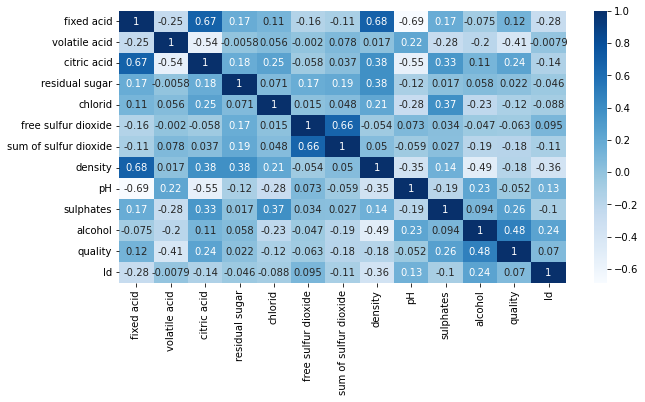

In [12]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), cmap="Blues", annot=True)
plt.show()

### Splitting data

In [14]:
df.columns

Index(['fixed acid', 'volatile acid', 'citric acid', 'residual sugar',
       'chlorid', 'free sulfur dioxide', 'sum of sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

**"alcohol"** is direct indicator of **"wine quality"**, as well as *'Id'* display row order, we can not use it as *input feature*

In [15]:
X = df.drop(columns=['quality', 'Id'])
y = df[['quality']]

In [17]:
x_train, x_test, y_train, y_test = sms.train_test_split(X, y, test_size=0.25, random_state=25)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(857, 11) (286, 11) (857, 1) (286, 1)


#### Data normalization(scaling)

In [18]:
feature_names = list(x_train.columns)
feature_names

['fixed acid',
 'volatile acid',
 'citric acid',
 'residual sugar',
 'chlorid',
 'free sulfur dioxide',
 'sum of sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [21]:
rb = RobustScaler()
x_train = pd.DataFrame(rb.fit_transform(x_train), columns=feature_names)
x_train

,fixed acid,volatile acid,citric acid,residual sugar,chlorid,free sulfur dioxide,sum of sulfur dioxide,density,pH,sulphates,alcohol
0,-0.35,-0.12,-0.242424,-0.142857,-0.40,-0.153846,-0.179487,0.406250,1.105263,0.555556,-0.3125
1,0.25,0.56,-0.212121,0.000000,0.70,-0.230769,0.948718,0.294643,-0.578947,-0.166667,-0.5625
2,-0.55,0.36,-0.545455,-0.428571,-0.55,1.076923,0.000000,-0.084821,0.578947,1.111111,-0.3750
3,-0.35,0.00,-0.393939,-0.285714,-1.05,0.307692,-0.410256,-0.433036,-0.526316,0.333333,-0.1250
4,-0.45,0.36,-0.484848,-1.142857,-0.40,1.000000,0.641026,-0.312500,-0.157895,-0.055556,-0.5625
...,...,...,...,...,...,...,...,...,...,...,...
852,0.15,0.68,-0.090909,-0.285714,1.00,0.000000,1.102564,0.267857,-0.631579,0.444444,-0.4375
853,-0.05,0.68,-0.606061,-0.428571,0.00,0.461538,-0.076923,-0.187500,0.473684,0.388889,0.5000
854,0.85,-0.84,0.636364,-1.142857,-1.15,-0.384615,-0.358974,0.111607,-0.473684,1.111111,0.1250
855,1.70,-0.76,0.575758,-0.285714,0.15,-0.615385,-0.589744,0.937500,-1.947368,0.222222,-0.5625


In [23]:
x_test = pd.DataFrame(rb.transform(x_test), columns=feature_names)
x_test

,fixed acid,volatile acid,citric acid,residual sugar,chlorid,free sulfur dioxide,sum of sulfur dioxide,density,pH,sulphates,alcohol
0,-0.25,-0.48,-0.060606,-0.571429,-0.65,0.307692,0.230769,-0.491071,0.315789,0.000000,0.1875
1,1.75,0.28,0.696970,0.714286,0.30,-0.307692,0.076923,1.205357,-0.842105,0.055556,0.2500
2,0.15,0.42,-0.484848,-0.142857,-0.30,0.846154,0.564103,-0.142857,-0.105263,0.722222,0.5000
3,0.05,-0.60,-0.606061,-0.571429,-0.05,-0.153846,0.282051,-0.200893,0.315789,-0.555556,-0.1250
4,-0.05,0.00,-0.666667,-0.714286,-0.15,0.230769,-0.179487,-0.133929,0.105263,-0.333333,-0.0625
...,...,...,...,...,...,...,...,...,...,...,...
281,1.35,-0.12,0.575758,0.571429,2.00,1.538462,0.769231,0.169643,-0.421053,0.555556,0.5000
282,1.05,-0.88,0.636364,0.571429,0.30,0.000000,-0.128205,1.316964,0.263158,1.000000,0.2500
283,0.40,-0.80,0.363636,1.571429,-0.80,-0.307692,-0.487179,-0.901786,-0.052632,0.611111,1.1875
284,0.35,-0.64,1.181818,6.000000,0.05,-0.846154,-0.769231,0.656250,-0.210526,-0.222222,0.5625


### Modelling

In [24]:
# to merge all scores and metrics results altogether
performance=pd.DataFrame(data=None, index=['BAS','AS', 'RAS'])
performance

""
BAS
AS
RAS


In [38]:
# creating function to evaluate model at one run
def evaluate(model,model_name):
    performance[model_name]=[sm.balanced_accuracy_score(y_test, model.predict(x_test)),
    sm.accuracy_score(y_test, model.predict(x_test)), 
    sm.roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr')]
    
    print(sm.classification_report(y_test, model.predict(x_test)))
    print("--------Balanced Accuracy Score--------")
    print(sm.balanced_accuracy_score(y_test, model.predict(x_test)))
    print("-------Accuracy Score------------------")
    print(sm.accuracy_score(y_test, model.predict(x_test)))
    print("-------ROC-AUC Score------------------")
    print(sm.roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr'))
    
pd.options.display.float_format = '{:.3f}'.format

#### Logistic regression

We will do **Hyperparameter tuning** to find **otimal best** parameters in some models

In [39]:
parameters = {'penalty':('l1','l2','elastic', 'none'),'C':[1, 10, 50, 100] }
lr1 = slm.LogisticRegression()
clf1 = sms.GridSearchCV(lr1, parameters)
clf1.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 50, 100],
                         'penalty': ('l1', 'l2', 'elastic', 'none')})

In [40]:
evaluate(clf1, 'Log_reg_0.5')

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         7
           5       0.64      0.72      0.68       114
           6       0.59      0.62      0.60       125
           7       0.46      0.34      0.39        35
           8       0.00      0.00      0.00         3

    accuracy                           0.60       286
   macro avg       0.28      0.28      0.28       286
weighted avg       0.57      0.60      0.58       286

--------Balanced Accuracy Score--------
0.2796925647451964
-------Accuracy Score------------------
0.5979020979020979
-------ROC-AUC Score------------------
0.7554875824571262


#### SVC classification model

In [43]:
parameters = {'C':[1, 10, 50, 100] }
svc = svm.SVC(probability=True)
clf2 = sms.GridSearchCV(svc, parameters)
clf2.fit(x_train, y_train)
clf2.best_params_

{'C': 1}

In [44]:
evaluate(clf2, 'SVC')

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         7
           5       0.63      0.71      0.67       114
           6       0.58      0.67      0.62       125
           7       0.46      0.17      0.25        35
           8       0.00      0.00      0.00         3

    accuracy                           0.60       286
   macro avg       0.28      0.26      0.26       286
weighted avg       0.56      0.60      0.57       286

--------Balanced Accuracy Score--------
0.2589924812030075
-------Accuracy Score------------------
0.5979020979020979
-------ROC-AUC Score------------------
0.8145129536172305


In [45]:
performance[['SVC']]

,SVC
BAS,0.259
AS,0.598
RAS,0.815


### Ensemble methods

#### RandomForest classification model

In [67]:
parameters = { 'n_estimators':[i for i in range(150,250,10)] }
rfc = ens.RandomForestClassifier(random_state=25)
clf3 = sms.GridSearchCV(rfc, parameters)
clf3.fit(x_train, y_train)

clf3.best_params_

{'n_estimators': 190}

In [68]:
evaluate(clf3, 'R_Forest')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         7
           2       0.67      0.74      0.70       114
           3       0.64      0.69      0.66       125
           4       0.65      0.43      0.52        35
           5       0.50      0.33      0.40         3

    accuracy                           0.65       286
   macro avg       0.41      0.36      0.38       286
weighted avg       0.63      0.65      0.64       286

--------Balanced Accuracy Score--------
0.36445781119465326
-------Accuracy Score------------------
0.6503496503496503
-------ROC-AUC Score------------------
0.7663747892348876


In [48]:
performance[['R_Forest']]

,R_Forest
BAS,0.364
AS,0.650
RAS,0.766


#### ExtraTree classification model

In [65]:
parameters = { 'n_estimators':[i for i in range(20,150,10)] }
etc = ens.ExtraTreesClassifier(random_state=25)
clf4 = sms.GridSearchCV(etc, parameters)
clf4.fit(x_train, y_train)

clf4.best_params_

{'n_estimators': 30}

In [66]:
evaluate(clf4, 'ExTree')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         7
           2       0.68      0.72      0.70       114
           3       0.63      0.72      0.67       125
           4       0.74      0.40      0.52        35
           5       0.50      0.33      0.40         3

    accuracy                           0.65       286
   macro avg       0.42      0.36      0.38       286
weighted avg       0.64      0.65      0.64       286

--------Balanced Accuracy Score--------
0.36210526315789476
-------Accuracy Score------------------
0.6538461538461539
-------ROC-AUC Score------------------
0.7772368566288068


#### GradientBoosting classification model

In [69]:
parameters = { 'learning_rate':[0.1,0.01,0.001], 'n_estimators':[50,100,180,200,220,250] }
gbc = ens.GradientBoostingClassifier(random_state=25)
clf5 = sms.GridSearchCV(gbc, parameters)
clf5.fit(x_train, y_train)

clf5.best_params_

{'learning_rate': 0.1, 'n_estimators': 220}

In [70]:
evaluate(clf5, 'GradientBC')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.25      0.14      0.18         7
           2       0.66      0.72      0.69       114
           3       0.62      0.66      0.64       125
           4       0.74      0.40      0.52        35
           5       0.25      0.33      0.29         3

    accuracy                           0.63       286
   macro avg       0.42      0.38      0.39       286
weighted avg       0.63      0.63      0.63       286

--------Balanced Accuracy Score--------
0.37658145363408524
-------Accuracy Score------------------
0.6328671328671329
-------ROC-AUC Score------------------
0.677742538146453


#### AdaBoost classification model

In [54]:
parameters = { 'learning_rate':[0.1, 1, 2], 'n_estimators':[50,100,150,200]}
abc = ens.AdaBoostClassifier(random_state=25)
clf6 = sms.GridSearchCV(abc, parameters)
clf6.fit(x_train, y_train)

clf6.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [55]:
evaluate(clf6, 'AdaBC')

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         7
           5       0.60      0.65      0.62       114
           6       0.55      0.66      0.60       125
           7       0.60      0.17      0.27        35
           8       0.00      0.00      0.00         3

    accuracy                           0.57       286
   macro avg       0.29      0.25      0.25       286
weighted avg       0.55      0.57      0.54       286

--------Balanced Accuracy Score--------
0.24742522974101921
-------Accuracy Score------------------
0.5699300699300699
-------ROC-AUC Score------------------
0.7488464174762798


#### XGBoost classification model

In [59]:
newlabel_change = {3:0, 4:1, 5:2, 6:3, 7:4, 8:5}
y_train = y_train['quality'].map(newlabel_change)
y_test = y_test['quality'].map(newlabel_change)

In [75]:
parameters = {
        'gamma': [0.5, 1, 1.5, 2, 5],
        'max_depth': [3, 4, 5], 
    'learning_rate':[0.01, 0.02, 0.05], 'n_estimators':[100, 500, 1000]}

xgbc = XGBClassifier()
clf7 = sms.GridSearchCV(xgbc, parameters)
clf7.fit(x_train, y_train)

clf7.fit(x_train, y_train)
clf7.best_params_

{'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}

In [77]:
evaluate(clf7, 'XGBC')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.14      0.20         7
           2       0.62      0.68      0.64       114
           3       0.59      0.62      0.60       125
           4       0.57      0.37      0.45        35
           5       0.40      0.67      0.50         3

    accuracy                           0.59       286
   macro avg       0.42      0.41      0.40       286
weighted avg       0.59      0.59      0.59       286

--------Balanced Accuracy Score--------
0.4120651629072682
-------Accuracy Score------------------
0.5944055944055944
-------ROC-AUC Score------------------
0.6869037081800352


#### XGBRFoost classification model

In [78]:
parameters = {
        'max_depth': [2, 3, 4], 
    'learning_rate':[0.04, 0.05, 0.06], 'n_estimators':[500, 600, 700]}

xgbrfc = XGBRFClassifier()
clf8 = sms.GridSearchCV(xgbrfc, parameters)
clf8.fit(x_train, y_train)

clf8.fit(x_train, y_train)
clf8.best_params_

{'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 500}

In [79]:
evaluate(clf8, 'XGBRFC')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.14      0.22         7
           2       0.64      0.70      0.67       114
           3       0.58      0.66      0.62       125
           4       0.44      0.20      0.27        35
           5       0.00      0.00      0.00         3

    accuracy                           0.60       286
   macro avg       0.36      0.28      0.30       286
weighted avg       0.57      0.60      0.58       286

--------Balanced Accuracy Score--------
0.28476858813700917
-------Accuracy Score------------------
0.5979020979020979
-------ROC-AUC Score------------------
0.635444874305228


In [80]:
performance

,Log_reg_0.5,SVC,R_Forest,ExTree,GradientBC,AdaBC,XGBC,XGBRFC
BAS,0.280,0.259,0.364,0.362,0.377,0.247,0.412,0.285
AS,0.598,0.598,0.650,0.654,0.633,0.570,0.594,0.598
RAS,0.755,0.815,0.766,0.777,0.678,0.749,0.687,0.635


I merged evaluation metrics and scores of all models we trained into **"performance"** in order to make the comparison. So, that can be seen some models performed better like **XGBC, RandomForest, ExtraTree** models. Particularly, doing of **hyperparameter tuning** boosted performance on closer optimal values

According to the comparison of models performances, the **XGBC(Extreme Gradient Boosting Classifier)** is the optimal model to pick and to utilize as the major

**Thanks**